In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [3]:
folder_dir = '../data/'
date_range = ["2012","2013","2014","2015","2016","2017"]

In [4]:
for i in range(len(date_range)):
    year = date_range[i]
    data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
    year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
    
    if i == 0:
        data = year_data
    else:
        data = pd.concat([data,year_data])

data.head()

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,break_length,y,x0,on_1b,on_2b,on_3b,umpcall,outcome,offense_score,defense_score
0,2012-04-04,Marlins Park,1,top,johnsjo09,5,beltrca01,0,0,30.626,...,3.4,154.56,-1.902,NaN,NaN,NaN,X,Single,0,0
1,2012-04-04,Marlins Park,1,top,johnsjo09,6,hollima01,0,0,28.580,...,3.8,132.11,-2.052,beltrca01,NaN,NaN,S,NaN,0,0
2,2012-04-04,Marlins Park,1,top,johnsjo09,7,hollima01,0,1,31.294,...,3.7,125.20,-2.130,beltrca01,NaN,NaN,S,NaN,0,0
3,2012-04-04,Marlins Park,1,top,johnsjo09,8,hollima01,0,2,33.548,...,3.6,151.97,-2.100,beltrca01,NaN,NaN,B,NaN,0,0
4,2012-04-04,Marlins Park,1,top,johnsjo09,9,hollima01,1,2,24.925,...,7.1,144.20,-2.312,beltrca01,NaN,NaN,X,Flyout,0,0


In [5]:
'''
TODO:
    -More exploratory data analysis
    -Feature engineering/Clean data/select features
    -Define target valuable   
    
'''

'\nTODO:\n    -More exploratory data analysis\n    -Feature engineering/Clean data/select features\n    -Define target valuable   \n    \n'

In [6]:
data = data.drop(['on_1b', 'on_2b', "on_3b",'y'], axis = 1)
data.shape

(3902210, 43)

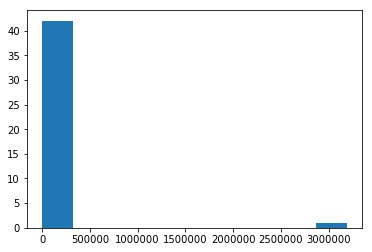

In [7]:
_ = plt.hist(data.isnull().sum())

In [8]:
data.columns.values

array(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count',
       'batter', 'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0',
       'vy0', 'pfx_x', 'type_confidence', 'z0', 'tfs', 'pz', 'start_speed',
       'az', 'zone', 'break_angle', 'spin_dir', 'end_speed', 'vx0',
       'sz_top', 'nasty', 'descr', 'pfx_z', 'break_y', 'pitch_type',
       'tfs_zulu', 'x', 'spin_rate', 'y0', 'break_length', 'x0', 'umpcall',
       'outcome', 'offense_score', 'defense_score'], dtype=object)

In [9]:
data.isnull().sum()

date                     0
stadium                  0
inning                   0
side                     0
pitcher                313
pitch_count              0
batter                   5
balls                    0
strikes                  0
ay                       0
px                       0
ax                       0
sz_bot                   0
vz0                      0
vy0                      0
pfx_x                    0
type_confidence          0
z0                       0
tfs                     29
pz                       0
start_speed              0
az                       0
zone                     0
break_angle              0
spin_dir                 0
end_speed                0
vx0                      0
sz_top                   0
nasty                  317
descr                    0
pfx_z                    0
break_y                  0
pitch_type               0
tfs_zulu                29
x                        0
spin_rate                0
y0                       0
b

(array([  273908.,   117352.,   197796.,   409078.,   174966.,   199062.,
          181744.,   522515.,   357548.,  1468241.]),
 array([  1. ,   2.3,   3.6,   4.9,   6.2,   7.5,   8.8,  10.1,  11.4,
         12.7,  14. ]),
 <a list of 10 Patch objects>)

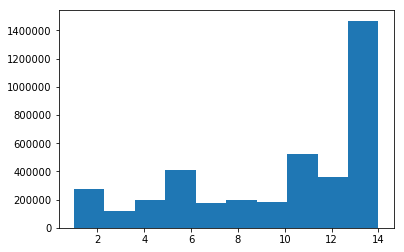

In [10]:
plt.hist(data['zone'])

(array([ 127781.,  222706.,  209657.,  570044.,  554273.,  963124.,
         906232.,  206608.,   76506.,   65279.]),
 array([ -2.00000000e-03,   3.59983000e+01,   7.19986000e+01,
          1.07998900e+02,   1.43999200e+02,   1.79999500e+02,
          2.15999800e+02,   2.52000100e+02,   2.88000400e+02,
          3.24000700e+02,   3.60001000e+02]),
 <a list of 10 Patch objects>)

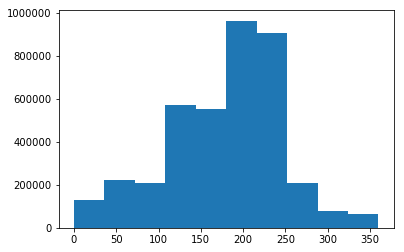

In [11]:
plt.hist(data['spin_dir'])

## 1. Target variable
We classify a pitch as good if it induces a swinging strike, a called strike, a foul, or if it generates a
ball in play that is converted to an out

In [12]:
data.outcome.unique()

array(['Single', nan, 'Flyout', 'Groundout', 'Pop Out', 'Lineout',
       'Sac Bunt', 'Forceout', 'Double Play', 'Grounded Into DP', 'Double',
       'Fielders Choice', 'Field Error', 'Triple', 'Home Run', 'Sac Fly',
       'Fielders Choice Out', 'Bunt Groundout', 'Bunt Pop Out',
       'Fan interference', 'Triple Play', 'Batter Interference',
       'Sac Fly DP', 'Bunt Lineout', 'Catcher Interference',
       'Sacrifice Bunt DP', 'Fly Out', 'Reach on Error',
       'Pitcher Interference'], dtype=object)

In [13]:
data.umpcall.unique()

array(['X', 'S', 'B'], dtype=object)

In [14]:
data.descr.unique()

array(['In play, no out', 'Foul Tip', 'Swinging Strike', 'Ball',
       'In play, out(s)', 'Called Strike', 'In play, run(s)', 'Foul',
       'Foul (Runner Going)', 'Hit By Pitch', 'Ball In Dirt', 'Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt'], dtype=object)

In [15]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice','Fielders Choice Out', 
             'Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

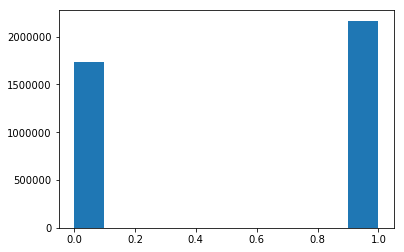

In [16]:
#Create target feature
data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

In [17]:
data.y.unique(), data.y.isnull().any()

(array([0, 1]), False)

In [18]:
data.columns

Index(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count', 'batter',
       'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x',
       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az', 'zone',
       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
       'descr', 'pfx_z', 'break_y', 'pitch_type', 'tfs_zulu', 'x', 'spin_rate',
       'y0', 'break_length', 'x0', 'umpcall', 'outcome', 'offense_score',
       'defense_score', 'y'],
      dtype='object')

## 2. Divide in Train (2012-2106) and Test (2017)

In [19]:
#Drop columns we´re not going to use
data['year']=data['date'].str.slice(0,4)

features=['umpcall', 'outcome','start_speed','pfx_x','pfx_z','px','pz','break_y','break_angle','break_length','pitch_type',
         'spin_dir','nasty','pitch_count','descr','y','year','zone','strikes','balls','pitcher']
baseline_features=['start_speed','px','pz','year','y']

data=data[features]
data_base=data[baseline_features]

In [20]:
#data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
#year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
save_path=folder_dir+'data_clean.csv'
data.to_csv(save_path) 

In [21]:
#data = data.drop(['on_1b', 'on_2b', "on_3b"], axis = 1)
X_train=data_base[data_base['year']!='2017']
y_train=X_train['y']
X_train=X_train.drop(['y','year'],axis=1)

X_test=data_base[data_base['year']=='2017']
y_test=X_test['y']
X_test=X_test.drop(['y','year'],axis=1)

X_train.head()

,start_speed,px,pz
0,94.9,0.316,2.033
1,92.9,-0.385,3.049
2,93.1,-0.971,3.336
3,92.9,-1.474,2.239
4,88.3,0.247,2.588


In [22]:
X_train.shape

(3186673, 3)

## 3. Baseline with Logistic Regression

In [23]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(X_train)
poly.fit_transform(X_test)

array([[  9.09000000e+01,  -6.36482000e-01,   2.15335000e+00,
         -5.78562138e+01,   1.95739515e+02,  -1.37056851e+00],
       [  9.05000000e+01,   5.40171000e-01,   3.49998000e+00,
          4.88854755e+01,   3.16748190e+02,   1.89058770e+00],
       [  7.52000000e+01,   3.42781000e-01,   1.59708000e+00,
          2.57771312e+01,   1.20100416e+02,   5.47448679e-01],
       ..., 
       [  9.23000000e+01,  -8.53413000e-01,   3.99002000e+00,
         -7.87700199e+01,   3.68278846e+02,  -3.40513494e+00],
       [  8.21000000e+01,  -1.12657000e+00,   2.90930000e+00,
         -9.24913970e+01,   2.38853530e+02,  -3.27753010e+00],
       [  9.21000000e+01,   4.04650000e-01,   1.77480000e+00,
          3.72682650e+01,   1.63459080e+02,   7.18172820e-01]])

In [24]:
X_train.shape, X_test.shape

((3186673, 3), (715537, 3))

In [25]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#print(list(zip(list(X_train.columns),list(baseline.coef_[0]))))
baseline.coef_

array([[-0.00026723,  0.00940246,  0.20150652]])

In [27]:
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))

Baseline accuracy: 0.62, Baseline log loss: 0.68, Majority class: 0.55 


# LR with all features

In [31]:
X_train=data[data['year']!='2017']
y_train=X_train['y']
X_train=X_train.drop(['y','year'],axis=1)

X_test=data[data['year']=='2017']
y_test=X_test['y']
X_test=X_test.drop(['y','year'],axis=1)

X_train.head()

,umpcall,outcome,start_speed,pfx_x,pfx_z,px,pz,break_y,break_angle,break_length,pitch_type,spin_dir,nasty,pitch_count,descr,zone,strikes,balls,pitcher
0,X,Single,94.9,-4.22,9.66,0.316,2.033,23.8,23.6,3.4,FF,203.490,56.0,5,"In play, no out",9,0,0,johnsjo09
1,S,NaN,92.9,-1.34,8.26,-0.385,3.049,23.8,4.9,3.8,FF,189.150,53.0,6,Foul Tip,4,0,0,johnsjo09
2,S,NaN,93.1,-3.84,9.17,-0.971,3.336,23.8,21.3,3.7,FF,202.631,58.0,7,Swinging Strike,11,1,0,johnsjo09
3,B,NaN,92.9,-1.64,9.56,-1.474,2.239,23.7,8.8,3.6,FF,189.712,28.0,8,Ball,13,2,0,johnsjo09
4,X,Flyout,88.3,4.96,2.46,0.247,2.588,23.9,-18.1,7.1,SL,116.781,25.0,9,"In play, out(s)",6,2,1,johnsjo09


In [32]:
import category_encoders as ce
X_train = X_train.drop( ['pitch_type','outcome', 'umpcall', "descr", 'pitcher' ], axis = 1)

# enc = ce.OneHotEncoder(cols = ['outcome'],handle_unknown = "ignore")
# enc.fit(X_train)
# X_train_one_hot = enc.transform(X_train)
# X_test_one_hot = enc.transform(X_test)

In [37]:
X_train.head()

,start_speed,pfx_x,pfx_z,px,pz,break_y,break_angle,break_length,spin_dir,nasty,pitch_count,zone,strikes,balls
0,94.9,-4.22,9.66,0.316,2.033,23.8,23.6,3.4,203.490,56.0,5,9,0,0
1,92.9,-1.34,8.26,-0.385,3.049,23.8,4.9,3.8,189.150,53.0,6,4,0,0
2,93.1,-3.84,9.17,-0.971,3.336,23.8,21.3,3.7,202.631,58.0,7,11,1,0
3,92.9,-1.64,9.56,-1.474,2.239,23.7,8.8,3.6,189.712,28.0,8,13,2,0
4,88.3,4.96,2.46,0.247,2.588,23.9,-18.1,7.1,116.781,25.0,9,6,2,1


In [33]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
baseline.coef_

array([[ -1.27646489e-02,  -4.93571529e-03,  -6.14750745e-03,
          7.06920199e-02,  -2.15594323e-01,   1.49295051e-01,
         -1.52520387e-03,  -1.88560933e-02,  -1.99120778e-05,
          2.25605526e-02,  -4.94265923e-04,  -2.83128524e-01,
          1.64463908e-01,   1.65133852e-01]])

In [38]:
X_test = X_test.drop( ['pitch_type','outcome', 'umpcall', "descr", 'pitcher' ], axis = 1) 
X_test = X_test.fillna(0)
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))

/Users/groupm/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Baseline accuracy: 0.71, Baseline log loss: 0.58, Majority class: 0.55 


## Lasso

In [45]:
from sklearn import linear_model
lasso = LogisticRegression(C= 0.1, penalty = 'l1')
lasso.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
preds=lasso.predict(X_test)
lasso_acc=sklearn.metrics.accuracy_score(y_test,preds)
print(lasso_acc)

0.706863516492


In [53]:
for i in range(14):
    print(X_train.columns[i] + ': ' + str(lasso.coef_[0][i]))


start_speed: -0.0131787237949
pfx_x: -0.00512969792498
pfx_z: -0.00684345418147
px: 0.0705397488458
pz: -0.216865983124
break_y: 0.0719891476612
break_angle: -0.00155898050208
break_length: -0.0205046642726
spin_dir: -3.05994721999e-05
nasty: 0.0225556656452
pitch_count: -0.000494240290677
zone: -0.28314071516
strikes: 0.164662844142
balls: 0.164999909588


## Decision Trees

In [ ]:
# differnt models one for ball one for direction